## Introduzione

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd   
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

outreach_ts = pd.read_csv('/home/jacoponudo/Documents/Size_effects/DATA/sample_outreach.csv')
pages = pd.read_csv('/home/jacoponudo/Documents/Size_effects/DATA/sample_pages.csv')
interactions = pd.read_csv('/home/jacoponudo/Documents/Size_effects/DATA/interacions/facebook_outreach_vs_interaction.csv', usecols=['post_id', 'alpha', 'outreach'])
posts = pd.read_csv('/home/jacoponudo/Documents/Size_effects/DATA/sample_posts.csv', usecols=['created_time', 'page_id', 'post_id'], encoding='ISO-8859-1')

posts_dict = posts.set_index('post_id').T.to_dict()
interactions['created_time'] = interactions['post_id'].map(lambda x: posts_dict.get(x, {}).get('created_time', None))
interactions['page_id'] = interactions['post_id'].map(lambda x: posts_dict.get(x, {}).get('page_id', None))

interactions=interactions.dropna()


/tmp/ipykernel_20423/3338287794.py:13: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  posts_dict = posts.set_index('post_id').T.to_dict()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dati
initial_size = pages['initial_size']
last_size = pages['last_size']
alpha = pages['alpha']
last_alpha = pages['last_alpha']

# Creazione dello scatter plot
plt.figure(figsize=(10, 6))

# Condizioni per i colori e i bordi
colors = np.where(alpha < 0.9, 'red', 'gray')  # Rosso se alpha < 0.9, altrimenti grigio
edgecolors = np.where(last_alpha < 0.9, 'red', 'none')  # Bordo rosso se last_alpha < 0.9, altrimenti nessun bordo

# Creazione dello scatter plot con le condizioni
plt.scatter(initial_size, last_size, alpha=0.5, edgecolors=edgecolors, facecolors=colors, s=70)

plt.title('Scatter Plot di Initial Size vs Last Size')
plt.xlabel('Initial Size')
plt.ylabel('Last Size')

# Imposta la scala logaritmica per entrambi gli assi
plt.xscale('log')
plt.yscale('log')

# Imposta i limiti degli assi
plt.xlim(1, 10**6)  # Modifica questi valori in base ai tuoi dati
plt.ylim(1, 10**6)  # Modifica questi valori in base ai tuoi dati

# Aggiungi una griglia
plt.grid(which='both', linestyle='--', linewidth=0.5)

plt.show()


In [57]:
import matplotlib.pyplot as plt
import numpy as np

# Dati
initial_size = pages['initial_size']
last_size = pages['last_size']
alpha = pages['alpha']
last_alpha = pages['last_alpha']

# Creazione dello scatter plot
plt.figure(figsize=(10, 6))

# Condizioni per i colori e i bordi
colors = np.where(alpha < 0.9, 'red', 'gray')  # Rosso se alpha < 0.9, altrimenti grigio
edgecolors = np.where(last_alpha < 0.9, 'red', 'none')  # Bordo rosso se last_alpha < 0.9, altrimenti nessun bordo

# Creazione dello scatter plot con le condizioni
plt.scatter(initial_size, last_size, alpha=0.5, edgecolors=edgecolors, facecolors=colors, s=70)

plt.title('Scatter Plot di Initial Size vs Last Size')
plt.xlabel('Initial Size')
plt.ylabel('Last Size')

# Imposta la scala logaritmica per entrambi gli assi
plt.xscale('log')
plt.yscale('log')

# Imposta i limiti degli assi
plt.xlim(1, 10**6)  # Modifica questi valori in base ai tuoi dati
plt.ylim(1, 10**6)  # Modifica questi valori in base ai tuoi dati

# Aggiungi una griglia
plt.grid(which='both', linestyle='--', linewidth=0.5)

plt.show()


KeyError: 'alpha'

In [23]:
outreach_ts['page_id'].unique()

array([ 157466287640348,  110299945719263,  192696260772574,
             7130088677,     194109891221,  842786335748518,
        164693013619204,  264329360246554,     295327362366,
        152535288239280,  321253057971308,     228444807376,
           105987640597,  133446376708654,  129476557086822,
            46726844467,     108066434972,  131498596889079,
        312705315487393,      98452961409,      62935143720,
            60149902595,       8260742627,       8969907778,
           122264309574,  253248861365174,  224870291024597,
           115517676270,      11878899813,       9924394837,
            35281584398,     181362508150,      67175109350,
        115591005188475,  108910729126586,      54971236771,
             7155422274,     270969375988,  111658128847068,
            24369314439,      55107646487,  148228411926492,
        146662198720301,  552321618120006,      30695878200,
             7711594722,     322352061097,  189189374491255,
        381700821924600,

/tmp/ipykernel_20423/3746253035.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  page_outreach_1['Date'] = pd.to_datetime(page_outreach_1['Date'])
/tmp/ipykernel_20423/3746253035.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  page_outreach_2['Date'] = pd.to_datetime(page_outreach_2['Date'])


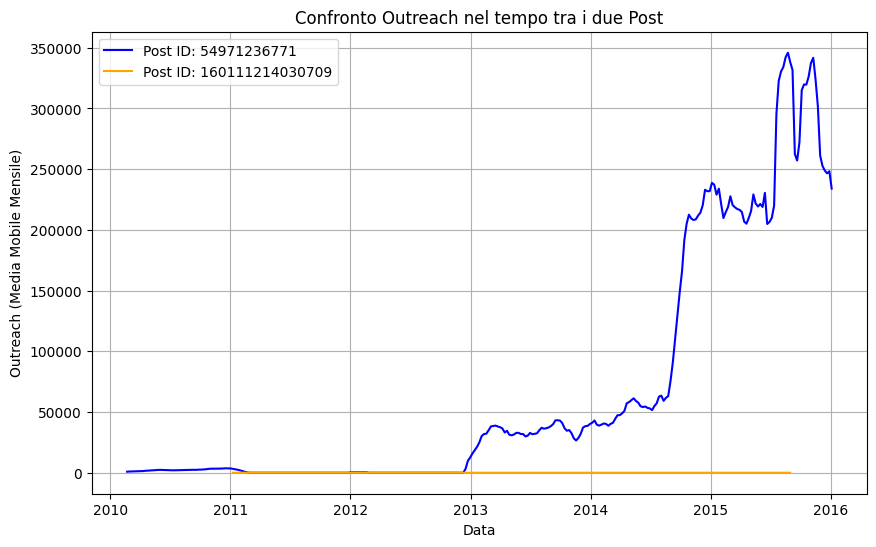

Non ci sono buchi nelle date per il primo post.
Non ci sono buchi nelle date per il secondo post.


In [29]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtra i dati per i due post_id
page_outreach_1 = outreach_ts[outreach_ts['page_id'] == 54971236771]
page_outreach_2 = outreach_ts[outreach_ts['page_id'] == 160111214030709]

# Conversione delle date in formato datetime e impostazione dell'indice
page_outreach_1['Date'] = pd.to_datetime(page_outreach_1['Date'])
page_outreach_2['Date'] = pd.to_datetime(page_outreach_2['Date'])

page_outreach_1.set_index('Date', inplace=True)
page_outreach_2.set_index('Date', inplace=True)

# Creazione della figura
plt.figure(figsize=(10, 6))

# Traccia la prima serie temporale
plt.plot(page_outreach_1.index, page_outreach_1['Monthly Moving Average'], color='blue', label='Post ID: 54971236771')

# Traccia la seconda serie temporale
plt.plot(page_outreach_2.index, page_outreach_2['Monthly Moving Average'], color='orange', label='Post ID: 160111214030709')

# Aggiunta del titolo e delle etichette degli assi
plt.title('Confronto Outreach nel tempo tra i due Post')
plt.xlabel('Data')
plt.ylabel('Outreach (Media Mobile Mensile)')

# Aggiunta della griglia e della legenda
plt.grid(True)
plt.legend()

# Visualizzazione del grafico
plt.show()

# Controllo per date mancanti
date_range_1 = pd.date_range(start=page_outreach_1.index.min(), end=page_outreach_1.index.max(), freq='W')
date_range_2 = pd.date_range(start=page_outreach_2.index.min(), end=page_outreach_2.index.max(), freq='W')

missing_dates_1 = date_range_1.difference(page_outreach_1.index)
missing_dates_2 = date_range_2.difference(page_outreach_2.index)

if not missing_dates_1.empty:
    print("Date mancanti nel primo post:", missing_dates_1)
else:
    print("Non ci sono buchi nelle date per il primo post.")

if not missing_dates_2.empty:
    print("Date mancanti nel secondo post:", missing_dates_2)
else:
    print("Non ci sono buchi nelle date per il secondo post.")


/tmp/ipykernel_20423/1226255900.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  page_interactions_1['created_time'] = pd.to_datetime(page_interactions_1['created_time']).copy()
/tmp/ipykernel_20423/1226255900.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  page_interactions_1['year_quarter'] = page_interactions_1['created_time'].dt.to_period('Q').dt.to_timestamp()
/tmp/ipykernel_20423/1226255900.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pag

Alpha Quarterly Outreach 1:
    year_quarter     outreach     alpha
0    2010-04-01     0.375000  1.000000
1    2010-07-01     0.250000  1.000000
2    2010-10-01     0.750000  1.000000
3    2012-01-01     0.000000  0.939394
4    2012-04-01   136.442484  0.914379
5    2012-07-01   187.194313  0.929922
6    2012-10-01   181.288494  0.952951
7    2013-01-01   265.615320  0.941255
8    2013-04-01   452.361351  0.961926
9    2013-07-01   582.925454  0.954739
10   2013-10-01  1017.235121  0.958131
11   2014-01-01  1651.672751  0.930748
12   2014-04-01  1941.377709  0.947272
13   2014-07-01  2207.173506  0.960661
14   2014-10-01  4234.330308  0.971679
15   2015-01-01  4887.181243  0.964158
16   2015-04-01  5895.992345  0.972555
17   2015-07-01  5301.740377  0.972276
18   2015-10-01  5559.101622  0.969302
Alpha Quarterly Outreach 2:
    year_quarter     outreach     alpha
0    2010-01-01     3.812500  0.964286
1    2010-04-01     4.094866  0.937500
2    2010-07-01    12.550945  0.928571
3    2

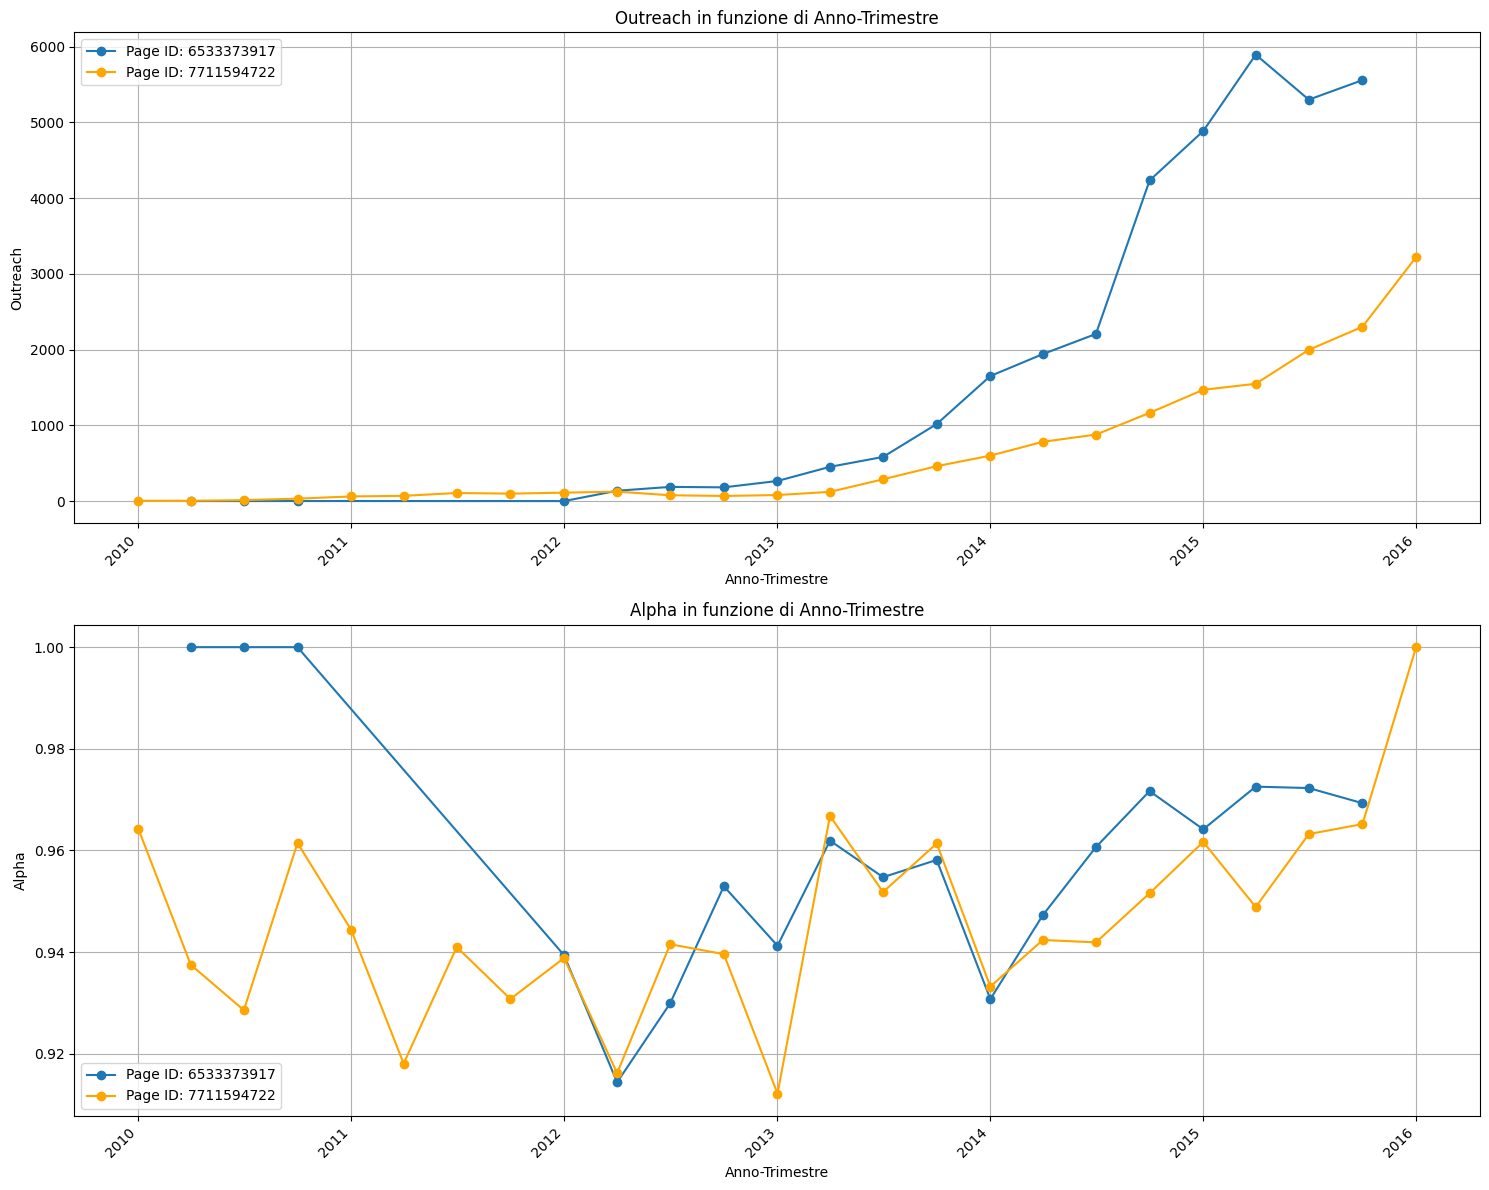

In [56]:
import matplotlib.pyplot as plt
import pandas as pd

# Filtraggio dei dati per le due pagine
page_interactions_1 = interactions[interactions['page_id'] == 6533373917]
page_interactions_2 = interactions[interactions['page_id'] == 7711594722] 

# Elaborazione dei dati per la prima pagina
page_interactions_1['created_time'] = pd.to_datetime(page_interactions_1['created_time']).copy()
page_interactions_1['year_quarter'] = page_interactions_1['created_time'].dt.to_period('Q').dt.to_timestamp()
alpha_quarter_outreach_1 = page_interactions_1.groupby(['year_quarter'])[['outreach', 'alpha']].mean().reset_index()

# Elaborazione dei dati per la seconda pagina
page_interactions_2['created_time'] = pd.to_datetime(page_interactions_2['created_time']).copy()
page_interactions_2['year_quarter'] = page_interactions_2['created_time'].dt.to_period('Q').dt.to_timestamp()
alpha_quarter_outreach_2 = page_interactions_2.groupby(['year_quarter'])[['outreach', 'alpha']].mean().reset_index()

# Stampa i dati per debug
print("Alpha Quarterly Outreach 1:\n", alpha_quarter_outreach_1)
print("Alpha Quarterly Outreach 2:\n", alpha_quarter_outreach_2)

plt.figure(figsize=(15, 12))

# Primo grafico: Outreach in funzione di Anno-Trimestre
plt.subplot(2, 1, 1)
plt.plot(alpha_quarter_outreach_1['year_quarter'], alpha_quarter_outreach_1['outreach'], marker='o', label='Page ID: 6533373917')
plt.plot(alpha_quarter_outreach_2['year_quarter'], alpha_quarter_outreach_2['outreach'], marker='o', color='orange', label='Page ID: 7711594722')
plt.title('Outreach in funzione di Anno-Trimestre')
plt.xlabel('Anno-Trimestre')
plt.ylabel('Outreach')
plt.legend()
plt.grid()
plt.xticks(rotation=45, ha='right')  

# Secondo grafico: Alpha in funzione di Anno-Trimestre
plt.subplot(2, 1, 2)
plt.plot(alpha_quarter_outreach_1['year_quarter'], alpha_quarter_outreach_1['alpha'], marker='o', label='Page ID: 6533373917')
plt.plot(alpha_quarter_outreach_2['year_quarter'], alpha_quarter_outreach_2['alpha'], marker='o', color='orange', label='Page ID: 7711594722')
plt.title('Alpha in funzione di Anno-Trimestre')
plt.xlabel('Anno-Trimestre')
plt.ylabel('Alpha')
plt.legend()
plt.grid()
plt.xticks(rotation=45, ha='right')

# Visualizza il grafico finale
plt.tight_layout()
plt.show()


0     2010-02
1     2010-03
2     2010-04
3     2010-05
4     2010-06
       ...   
67    2015-09
68    2015-10
69    2015-11
70    2015-12
71    2016-01
Name: year_month, Length: 72, dtype: period[M]

In [47]:
page_interactions_2

,post_id,alpha,outreach,created_time,page_id,year_month


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

page_outreach = outreach_ts[outreach_ts['page_id'] == 54971236771]

page_outreach['Date'] = pd.to_datetime(page_outreach['Date'])

page_outreach.set_index('Date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(page_outreach.index, page_outreach['Monthly Moving Average'], color='blue', label='Monthly Moving Average')


plt.title('Outreach nel tempo per la pagina 54971236771')
plt.xlabel('Data')
plt.ylabel('Outreach (Media Mobile Mensile)')

plt.grid(True)
plt.legend()

plt.show()

date_range = pd.date_range(start=page_outreach.index.min(), end=page_outreach.index.max(), freq='W')  # Frequenza settimanale
missing_dates = date_range.difference(page_outreach.index)

if not missing_dates.empty:
    print("Date mancanti:", missing_dates)
else:
    print("Non ci sono buchi nelle date.")

